In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = 'data/Base_nao_pagos_distancia_para_pagos_20200518.xlsx'
df = pd.read_excel(path)

In [3]:
df.head()

,CD_ALUNO_NAO_PAGO,NM_RESPONSAVEL_NAO_PAGO,CD_ALUNO_PAGO,NM_RESPONSAVEL_PAGO,DISTANCIA_EM_METROS,ORDEM,TELEFONE_PICPAY,CD_DDD1,NR_FONE1,CD_DDD2,NR_FONE2,CD_DDD3,NR_FONE3,CD_DDD4,NR_FONE4
0,10013870,JOSE ROZENO DA SILVA,21231735,ANDREA LOURENCO REQUENA,29.781,1,nan,nan,NaN,nan,NaN,19.000,998002531,nan,NaN
1,10013870,JOSE ROZENO DA SILVA,24247166,SUSANA DA SILVA PORPHIRIO,144.785,2,nan,nan,NaN,nan,NaN,19.000,983115131,nan,NaN
2,10013870,JOSE ROZENO DA SILVA,27899892,ADRIANA CRISTINA SILVA DOS SANTOS,299.847,3,19994591972.000,nan,NaN,nan,NaN,19.000,994591972,nan,NaN
3,10013870,JOSE ROZENO DA SILVA,35512424,GILVANETE GONCALVES RAMOS,359.555,4,nan,nan,NaN,nan,NaN,19.000,996997849,nan,NaN
4,10037134,JOSIANE THAINA PARENTE,27471916,ERICA DE FATIMA MELOTTI,63.184,1,nan,nan,NaN,nan,NaN,14.000,981914492,nan,NaN


In [4]:
df.shape

(415507, 15)

In [5]:
df.count()

CD_ALUNO_NAO_PAGO          415507
NM_RESPONSAVEL_NAO_PAGO    406871
CD_ALUNO_PAGO              415507
NM_RESPONSAVEL_PAGO        415507
DISTANCIA_EM_METROS        415507
ORDEM                      415507
TELEFONE_PICPAY             24159
CD_DDD1                     88907
NR_FONE1                    88907
CD_DDD2                      9071
NR_FONE2                     9071
CD_DDD3                    376542
NR_FONE3                   376542
CD_DDD4                     30515
NR_FONE4                    30515
dtype: int64

In [6]:
df.describe()

,CD_ALUNO_NAO_PAGO,CD_ALUNO_PAGO,DISTANCIA_EM_METROS,ORDEM,TELEFONE_PICPAY,CD_DDD1,CD_DDD2,CD_DDD3,CD_DDD4
count,415507.000,415507.000,415507.000,415507.000,24159.000,88907.000,9071.000,376542.000,30515.000
mean,26966896.772,27473219.258,193.022,2.662,14254164366.292,12.097,12.301,13.042,12.578
std,4413359.609,3640442.750,667.677,1.314,4672973702.715,2.559,3.063,3.498,3.285
min,940.000,9461.000,0.000,1.000,6798563205.000,0.000,0.000,0.000,0.000
25%,24792375.000,25324963.000,22.396,2.000,11961209006.000,11.000,11.000,11.000,11.000
50%,27043602.000,27395908.000,57.307,3.000,11988681728.000,11.000,11.000,11.000,11.000
75%,29678441.000,29856375.500,117.230,4.000,15997086121.000,11.000,12.000,15.000,13.000
max,37264967.000,37126106.000,14689.681,5.000,95991409644.000,99.000,99.000,99.000,99.000


In [7]:
df_sem_null = df.dropna(subset=['NR_FONE3'])

In [8]:
df_sem_null.head()

,CD_ALUNO_NAO_PAGO,NM_RESPONSAVEL_NAO_PAGO,CD_ALUNO_PAGO,NM_RESPONSAVEL_PAGO,DISTANCIA_EM_METROS,ORDEM,TELEFONE_PICPAY,CD_DDD1,NR_FONE1,CD_DDD2,NR_FONE2,CD_DDD3,NR_FONE3,CD_DDD4,NR_FONE4
0,10013870,JOSE ROZENO DA SILVA,21231735,ANDREA LOURENCO REQUENA,29.781,1,nan,nan,NaN,nan,NaN,19.000,998002531,nan,NaN
1,10013870,JOSE ROZENO DA SILVA,24247166,SUSANA DA SILVA PORPHIRIO,144.785,2,nan,nan,NaN,nan,NaN,19.000,983115131,nan,NaN
2,10013870,JOSE ROZENO DA SILVA,27899892,ADRIANA CRISTINA SILVA DOS SANTOS,299.847,3,19994591972.000,nan,NaN,nan,NaN,19.000,994591972,nan,NaN
3,10013870,JOSE ROZENO DA SILVA,35512424,GILVANETE GONCALVES RAMOS,359.555,4,nan,nan,NaN,nan,NaN,19.000,996997849,nan,NaN
4,10037134,JOSIANE THAINA PARENTE,27471916,ERICA DE FATIMA MELOTTI,63.184,1,nan,nan,NaN,nan,NaN,14.000,981914492,nan,NaN


In [9]:
df_sem_null_e_zero = df_sem_null[df_sem_null['NR_FONE3'] != '0']

In [17]:
filter_only_zero = df_sem_null_e_zero.groupby(['CD_ALUNO_NAO_PAGO'], sort=False, as_index=False)['DISTANCIA_EM_METROS'].sum()

filter_only_zero = filter_only_zero[filter_only_zero.DISTANCIA_EM_METROS == 0]

df_sem_null_e_zero = pd.merge(df_sem_null_e_zero, filter_only_zero, on=['CD_ALUNO_NAO_PAGO'], how='left')

df_sem_null_e_zero = df_sem_null_e_zero[pd.isnull(df_sem_null_e_zero.DISTANCIA_EM_METROS_y)]

In [18]:
filter_min = df_sem_null_e_zero.groupby(['CD_ALUNO_NAO_PAGO'], sort=False, as_index=False)['ORDEM'].min()

In [19]:
filter_min.head()

,CD_ALUNO_NAO_PAGO,ORDEM
0,10013870,1
1,10037134,1
2,10038267,1
3,10038856,1
4,10047898,1


In [20]:
df_min = pd.merge(df_sem_null_e_zero, filter_min, on=['CD_ALUNO_NAO_PAGO', 'ORDEM'], how='inner')

In [21]:
df_min.head()

,CD_ALUNO_NAO_PAGO,NM_RESPONSAVEL_NAO_PAGO,CD_ALUNO_PAGO,NM_RESPONSAVEL_PAGO,DISTANCIA_EM_METROS_x,ORDEM,TELEFONE_PICPAY,CD_DDD1,NR_FONE1,CD_DDD2,NR_FONE2,CD_DDD3,NR_FONE3,CD_DDD4,NR_FONE4,DISTANCIA_EM_METROS_y
0,10013870,JOSE ROZENO DA SILVA,21231735,ANDREA LOURENCO REQUENA,29.781,1,nan,nan,NaN,nan,NaN,19.000,998002531,nan,NaN,nan
1,10037134,JOSIANE THAINA PARENTE,27471916,ERICA DE FATIMA MELOTTI,63.184,1,nan,nan,NaN,nan,NaN,14.000,981914492,nan,NaN,nan
2,10038267,JOSEIANE INACIO PEREIRA,29893437,MARIO DA CONCEICAO,70.599,1,nan,nan,NaN,nan,NaN,12.000,991910451,nan,NaN,nan
3,10038856,JOSIANE CANDIDO BUENO DA SILVA,28561475,TATIANA APOLINARIO SOARES,13.073,1,nan,nan,NaN,nan,NaN,19.000,998876526,nan,NaN,nan
4,10047898,ELZA MARQUES,31701874,ALEXANDRE MARQUES GERALDO,0.000,1,nan,nan,NaN,nan,NaN,11.000,957647210,nan,NaN,nan


In [22]:
df_min.shape

(97580, 16)

In [28]:
df_min = df_min.rename(columns={"DISTANCIA_EM_METROS_x": "DISTANCIA_EM_METROS"})

In [29]:
df_min['DISTANCIA_EM_METROS'].describe()

count   97580.000
mean      119.527
std       463.268
min         0.000
25%        10.624
50%        31.942
75%        73.012
max     12562.530
Name: DISTANCIA_EM_METROS, dtype: float64

In [30]:
len(df_min['CD_ALUNO_NAO_PAGO'].value_counts())

97580

In [31]:
x = df_min['DISTANCIA_EM_METROS']

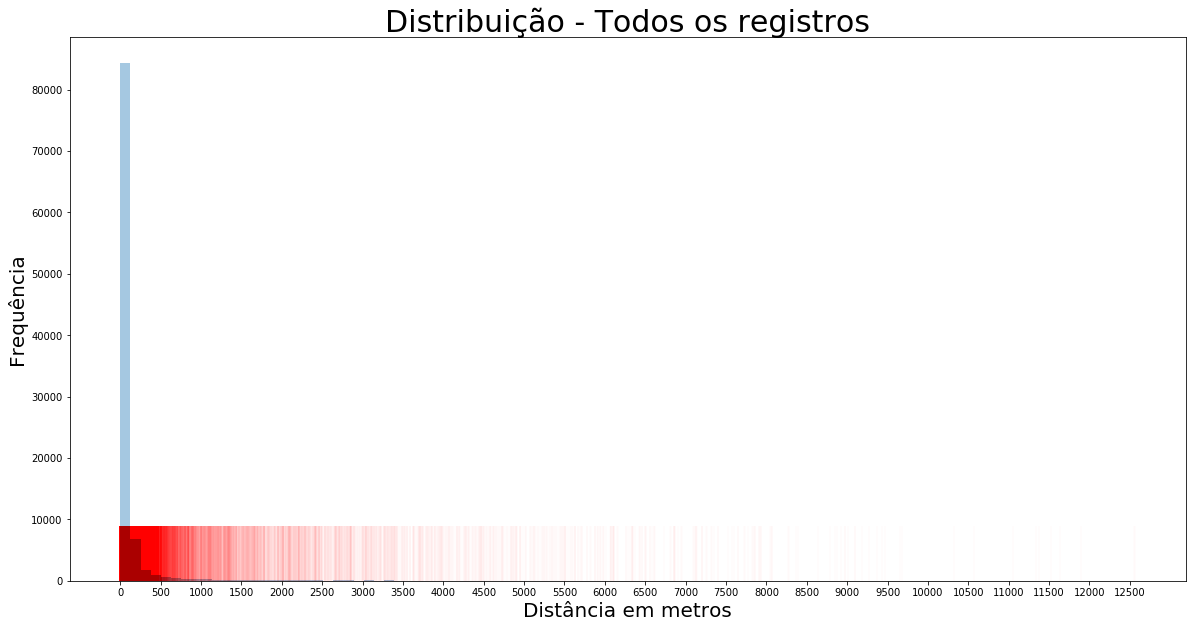

In [32]:
plt.figure(figsize=(20,10))
plt.title('Distribuição - Todos os registros', fontsize=30)
plt.xticks(np.arange(min(x), max(x)+1, 500))
sns.distplot(x, bins=100, kde=False, rug=True,
            rug_kws={"color": "r", "alpha":0.01, "linewidth": 2, "height":0.1 }
            )
plt.ylabel('Frequência', fontsize=20)
plt.xlabel('Distância em metros', fontsize=20)
plt.show()

In [33]:
x = df_min['DISTANCIA_EM_METROS'][df_min['DISTANCIA_EM_METROS'] <= 2000]

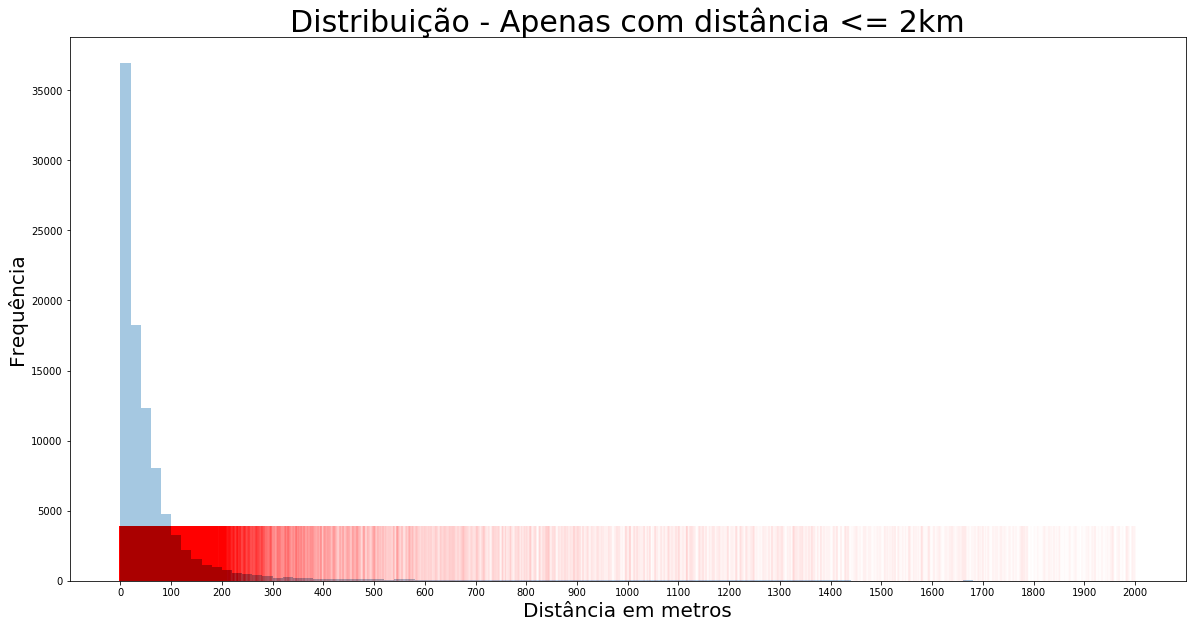

In [34]:
plt.figure(figsize=(20,10))
plt.title('Distribuição - Apenas com distância <= 2km', fontsize=30)
plt.xticks(np.arange(min(x), max(x)+1, 100))
sns.distplot(x, bins=100, kde=False, rug=True,
                        rug_kws={"color": "r", "alpha":0.01, "linewidth": 2, "height":0.1 })
plt.ylabel('Frequência', fontsize=20)
plt.xlabel('Distância em metros', fontsize=20)
plt.show()

In [35]:
x = df_min['DISTANCIA_EM_METROS'][df_min['DISTANCIA_EM_METROS'] <= 1000]

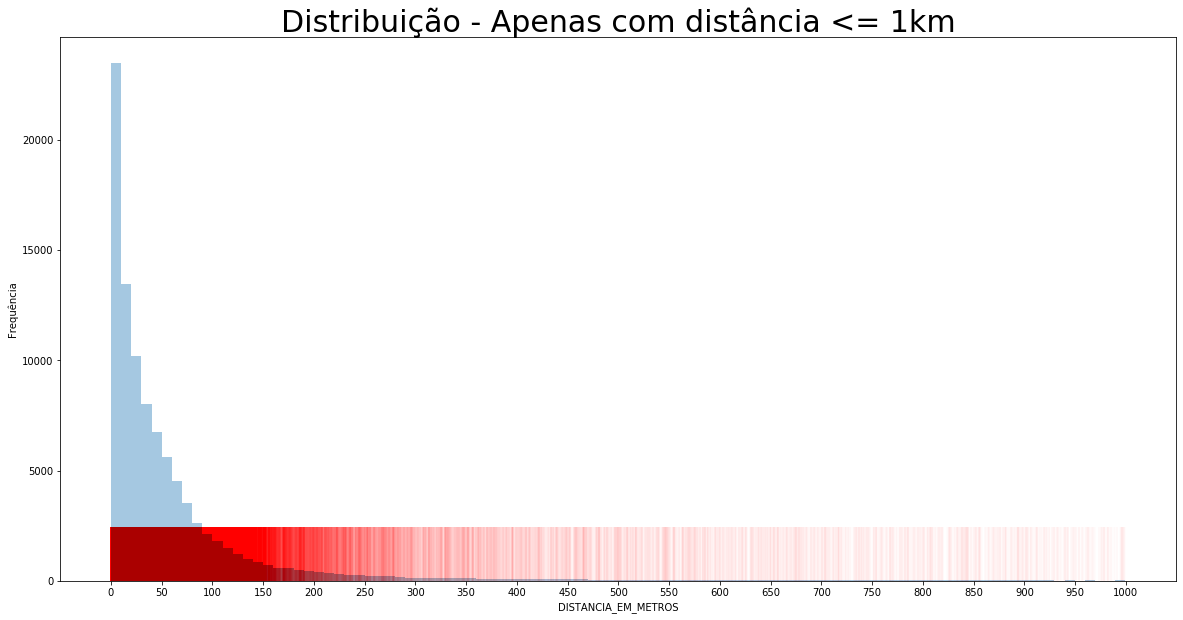

In [36]:
plt.figure(figsize=(20,10))
plt.title('Distribuição - Apenas com distância <= 1km', fontsize=30)
plt.xticks(np.arange(min(x), max(x)+1, 50))
plt.ylabel('Frequência')
sns.distplot(x, bins=100, kde=False, rug=True,
                        rug_kws={"color": "r", "alpha":0.01, "linewidth": 2, "height":0.1 })
plt.show()